In [1]:
# for analyzing the .mat files produced by SR785 Viewer program (on Hexagon4, Coffee Lab)
# or ascii files (see Kara's notes on the wiki for converting from d78)
# Preston Huft, Spring 2020

# winter 2020: on the SR785, when you hit Disk, you can rename the file to be myfile.mat, and then you don't need to
# reformat later

In [39]:
import scipy.io
import matplotlib.pyplot as plt
from numpy import *
import sys
sys.path.append('../')
from simfuncs import *

In [5]:
# put your files here
mat960 = scipy.io.loadmat('20200109_960powerspectrum.MAT')
mat780 = scipy.io.loadmat('20200109_780powerspectrum.MAT') # check the pzt file too
mat780b = scipy.io.loadmat('20200109_780Bpowerspectrum.MAT')
# mat780a = scipy.io.loadmat('780_filtercav_noise_eaten_20201223.MAT')

In [6]:
## GET DATA FROM MAT FILES
matfiles = ['20200109_960powerspectrum.MAT','20200109_780powerspectrum.MAT','20200109_780Bpowerspectrum.MAT']
matdicts = [scipy.io.loadmat(f) for f in matfiles] 
# get the keys. these are the filenames entered in the sr785 before hitting Display to Disk
[d.keys() for d in matdicts]

[dict_keys(['srs960rin']),
 dict_keys(['srs780arin']),
 dict_keys(['srs780brin'])]

In [7]:
## GET DATA FROM ASCII FILES
ascfiles = ['srs_filtercav_noise_eaten_rin_20201223.asc']
ascdata = []
for af in ascfiles:
    with open(af, 'r') as f:
        lines = f.readlines()
        data = []
        for i, line in enumerate(lines):
            if i > 14:
                data.append([float(l) for l in line.split(' ') if is_numeric(l)])
    ascdata.append(array(data))

In [24]:
ascdata[0]

array([[ 2.560000e+02, -2.728812e+01],
       [ 5.120000e+02, -3.590691e+01],
       [ 7.680000e+02, -4.229071e+01],
       [ 1.024000e+03, -4.490160e+01],
       [ 1.280000e+03, -4.853709e+01],
       [ 1.536000e+03, -5.100641e+01],
       [ 1.792000e+03, -5.210571e+01],
       [ 2.048000e+03, -5.526241e+01],
       [ 2.304000e+03, -6.045084e+01],
       [ 2.560000e+03, -6.332691e+01],
       [ 2.816000e+03, -6.446348e+01],
       [ 3.072000e+03, -6.629295e+01],
       [ 3.328000e+03, -6.815503e+01],
       [ 3.584000e+03, -6.733893e+01],
       [ 3.840000e+03, -6.290952e+01],
       [ 4.096000e+03, -6.048627e+01],
       [ 4.352000e+03, -6.175719e+01],
       [ 4.608000e+03, -6.170640e+01],
       [ 4.864000e+03, -6.061728e+01],
       [ 5.120000e+03, -6.317055e+01],
       [ 5.376000e+03, -6.718557e+01],
       [ 5.632000e+03, -6.856498e+01],
       [ 5.888000e+03, -6.893962e+01],
       [ 6.144000e+03, -7.016185e+01],
       [ 6.400000e+03, -7.141998e+01],
       [ 6.656000e+03, -7

In [8]:
# frequency [Hz], voltage [V] (if you selected linear/linear when saving the .mat file)
# hz1,v1 = mat960['srs960rin'].transpose()
hz2,v2 = mat780['srs780arin'].transpose()
hz3,v3 = mat780b['srs780brin'].transpose()
hz4,v4 = ascdata[0].transpose()

# the DC voltage recorded
vdc1 = .80
vdc2 = .67
vdc3 = vdc1
vdc4 = .310

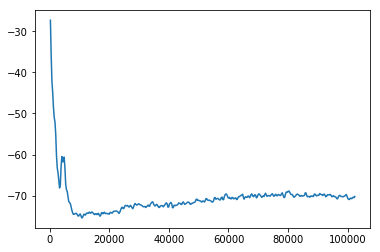

In [9]:
plt.plot(hz4, v4)

C:\Users\gothr\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


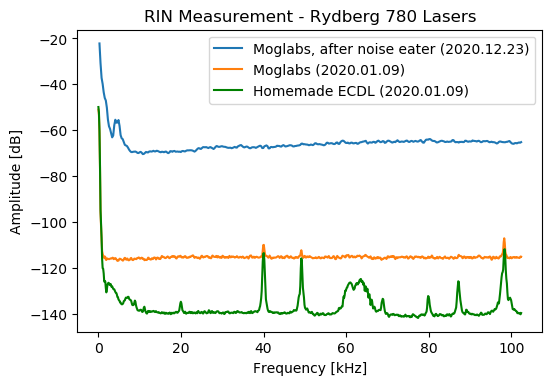

In [10]:
fig, ax = plt.subplots(dpi=100)
ax.plot(hz4/1e3,10*log10((10**(v4/10)/vdc4)), label='Moglabs, after noise eater (2020.12.23)') # note the base 10 log and 
ax.plot(hz3/1e3,10*log10(v3/vdc3), label='Moglabs (2020.01.09)',) # note the base 10 log and 
ax.plot(hz2/1e3,10*log10(v2/vdc2), label='Homemade ECDL (2020.01.09)',c='green')
# ax.plot(hz1/1e3,10*log10(v1/vdc1), label='960 (Toptica ECDL)',c='red')
ax.set_title("RIN Measurement - Rydberg 780 Lasers")
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel("Amplitude [dB]")
ax.legend()
fname = 'rin_compare_780A_20201223.png'
# plt.savefig(fname, bbox_inches='tight')

In [32]:
fname = 'soln_rin_780_20201223.csv'
lbls = ['frequency [Hz]',
        'Moglabs after noise eater']

rin1 = [vdc4] + list(v4)
data = [ hz4, rin1 ] # first datum in each rin column is the dc voltage
# soln_to_csv(fname, data, lbls)

wrote data to soln_rin_780_20201223.csv


In [22]:
fname = 'soln_rin_compare_780_20200109.csv'
lbls = ['frequency [Hz]',
        'Moglabs (2020.01.09)',
        'Homemade ECDL (2020.01.09)']
data3 = [vdc3]
data3 += list(v3)
data2 = [vdc2]
data2 += list(v2)
data = [ hz2, data3, data2 ] # first datum in each column is the dc voltage
# soln_to_csv(fname, data, lbls)

wrote data to soln_rin_compare_780_20200109.csv


In [33]:
(f,x1), testlbls = soln_from_csv(fname)

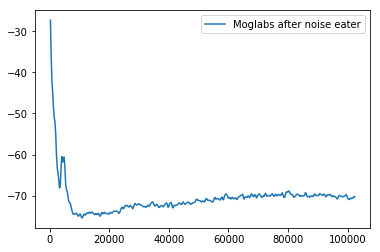

In [35]:
plt.plot(f,x1[1:], label=testlbls[1])
# plt.plot(f,10*log10(x1[1:]/x1[0]), label=testlbls[1])
plt.legend()

In [ ]:
# the DC voltage recorded
vdc1 = .80
vdc2 = .67
vdc3 = .3

fig, ax = plt.subplots()
ax.plot(hz3/1e3,10*log10(v3/vdc3), label='780B (Moglabs ECDL)',) # note the base 10 log and 
# ax.plot(hz2/1e3,10*log10(v2/vdc2), label='780A (Homemade ECDL)',c='green')
# ax.plot(hz1/1e3,10*log10(v1/vdc1), label='960 (Toptica ECDL)',c='red')
ax.set_title("RIN Measurement 2020/01/09")
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel("Amplitude [dB]")
ax.legend()